# Recommendation system for e-commerce businesses
The recommendation system is designed in 3 parts based on the business context:

Recommendation system part I: Product pupularity based system targetted at new customers

Recommendation system part II: Model-based collaborative filtering system based on customer's purchase history and ratings provided by other users who bought items similar items

Recommendation system part III: When a business is setting up its e-commerce website for the first time withou any product rating

When a new customer without any previous purchase history visits the e-commerce website for the first time, he/she is recommended the most popular products sold on the company's website. Once, he/she makes a purchase, the recommendation system updates and recommends other products based on the purchase history and ratings provided by other users on the website. The latter part is done using collaborative filtering techniques.

## Recommendation System - Part I
### Product popularity based recommendation system targeted at new customers
Popularity based are a great strategy to target the new customers with the most popular products sold on a business's website and is very useful to cold start a recommendation engine.

**Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import sklearn
from sklearn.decomposition import TruncatedSVD

**Loading the dataset**

In [2]:
df_transaction = pd.read_csv('../input/제6회 L.POINT Big Data Competition-분석용데이터-02.거래 정보.csv', parse_dates=['de_dt'])
df_product = pd.read_csv('../input/제6회 L.POINT Big Data Competition-분석용데이터-04.상품분류 정보.csv')

In [3]:
df_transaction.head()

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
0,21922,104999,1,A03,unknown,2019-09-20,12:41,5990,1
1,21279,104907,4,A03,unknown,2019-09-20,10:27,10900,1
2,39423,105124,11,A03,unknown,2019-09-20,17:26,12900,1
3,18362,104010,1,A03,unknown,2019-09-20,09:57,9900,1
4,39423,105124,13,A03,0565,2019-09-20,17:26,2990,1


In [65]:
df_transaction['de_dt'].unique()

array(['2019-09-20T00:00:00.000000000', '2019-09-21T00:00:00.000000000',
       '2019-09-22T00:00:00.000000000', '2019-09-23T00:00:00.000000000',
       '2019-09-24T00:00:00.000000000', '2019-09-25T00:00:00.000000000',
       '2019-09-13T00:00:00.000000000', '2019-09-14T00:00:00.000000000',
       '2019-09-16T00:00:00.000000000', '2019-09-15T00:00:00.000000000',
       '2019-09-17T00:00:00.000000000', '2019-09-26T00:00:00.000000000',
       '2019-09-18T00:00:00.000000000', '2019-09-19T00:00:00.000000000',
       '2019-08-02T00:00:00.000000000', '2019-08-05T00:00:00.000000000',
       '2019-08-03T00:00:00.000000000', '2019-08-01T00:00:00.000000000',
       '2019-08-06T00:00:00.000000000', '2019-08-07T00:00:00.000000000',
       '2019-08-04T00:00:00.000000000', '2019-08-08T00:00:00.000000000',
       '2019-08-10T00:00:00.000000000', '2019-08-09T00:00:00.000000000',
       '2019-08-11T00:00:00.000000000', '2019-08-12T00:00:00.000000000',
       '2019-09-01T00:00:00.000000000', '2019-09-02

In [4]:
df_product.head()

,pd_c,clac_nm1,clac_nm2,clac_nm3
0,1,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Automobile Oil / Additives
1,2,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Car Lights
2,3,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Car Paint
3,4,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Filters
4,5,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Wiper Blades


In [5]:
# convert df_product['pd_c'] datatype : int -> object
df_product['pd_c'] = df_product['pd_c'].apply(lambda num: "{:04n}".format(num))

# df_transaction and df_prodcct merge!
df = pd.merge(df_transaction, df_product, how='left')

column_titles = ['clnt_id', 'de_dt', 'pd_c', 'clac_nm1', 'clac_nm2', 'clac_nm3', 'buy_am', 'buy_ct']
df.reindex(columns=column_titles).tail()

,clnt_id,de_dt,pd_c,clac_nm1,clac_nm2,clac_nm3,buy_am,buy_ct
599956,35311,2019-09-27,0339,Cosmetics / Beauty Care,Skin Care,Facial Masks,3500,1
599957,35311,2019-09-27,0339,Cosmetics / Beauty Care,Skin Care,Facial Masks,3600,2
599958,35311,2019-09-27,0339,Cosmetics / Beauty Care,Skin Care,Facial Masks,3500,1
599959,35311,2019-09-27,0339,Cosmetics / Beauty Care,Skin Care,Facial Masks,4500,1
599960,35311,2019-09-27,0324,Cosmetics / Beauty Care,Makeup,Nail Stickers / Stones,6800,1


In [6]:
df.shape

(599961, 12)

In [7]:
popular_nm1 = pd.DataFrame(df.groupby('clac_nm1')['buy_ct'].count())
most_popular_nm1 = popular_nm1.sort_values('buy_ct', ascending=False)
most_popular_nm1.head(10)

,buy_ct
clac_nm1,
Vegetables,69308
Snack Foods,58880
Dairy Products,46474
Meats,44157
Chilled Foods,43926
Substitute Foods,42477
Beverages,34756
Fruits,33540
Frozen Foods,30104


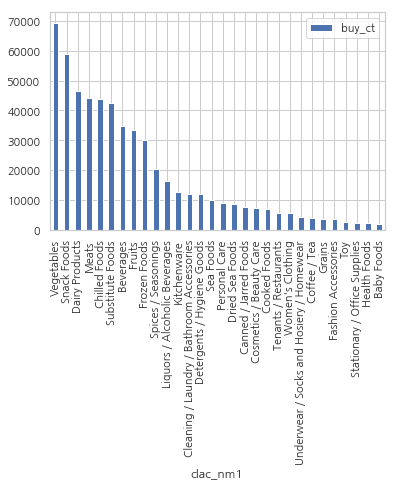

In [8]:
most_popular_nm1.head(30).plot(kind = "bar")

In [9]:
popular_nm2 = pd.DataFrame(df.groupby('clac_nm2')['buy_ct'].count())
most_popular_nm2 = popular_nm2.sort_values('buy_ct', ascending=False)
most_popular_nm2.head(10)

,buy_ct
clac_nm2,
Snacks,30040
Domestic Fruits,19439
Frozen Instant Foods,19250
Milk,19207
Tofu / Bean Sprouts,18153
Yogurt,17489
Instant Noodles,16679
Leaf Vegetables,15594
Fruit Vegetables,14155


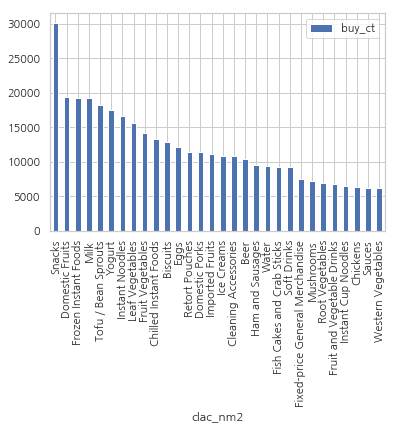

In [10]:
most_popular_nm2.head(30).plot(kind = "bar")

In [11]:
popular_nm3 = pd.DataFrame(df.groupby('clac_nm3')['buy_ct'].count())
most_popular_nm3 = popular_nm3.sort_values('buy_ct', ascending=False)
most_popular_nm3.head(10)

,buy_ct
clac_nm3,
General Snacks,15518
Fresh Milk,12914
Chicken Eggs,11115
Ramens,11083
Tofu,10850
Trash Bags,10254
Spoon Type Yogurts,8417
Water,7882
Corn Snacks,7610


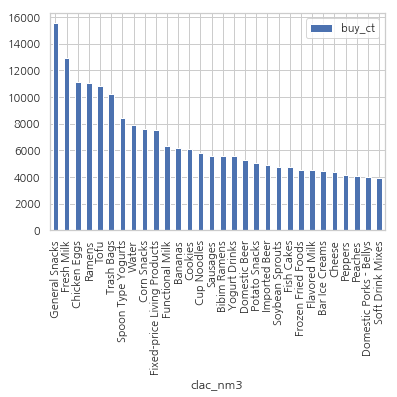

In [12]:
most_popular_nm3.head(30).plot(kind = "bar")

*Analysis:*
The above graph gives us the most popular products(arranged in descending order) sold by the business.

## Recommendation System - part II

### Model-based collaborative filtering system

Recommend items to users based on purchase history and similarity of ratings provided by other users who bought items to that of a prticular customer.

A model based collaborative filtering technique is closen here as it helps in making predicting products for a particular user by identifying patterns based on preferences from multiple user data.

**Utility Matrix based on client ID and product ID**

Utility Matrix

An utility is consists of all possible user-item preferences (buy count) details represented as a matrix.
The utility matrix is sparse most of the values are unknown.

In [28]:
df.loc[df['pd_c'] == 'unknown', 'pd_c'] = '0000'

In [14]:
# df['pd_c'] = df['pd_c'].astype(int)

In [29]:
utility_matrix = df.pivot_table(values='buy_ct', index='clnt_id', columns='pd_c', fill_value=0)
utility_matrix.head()

pd_c,0000,0001,0002,0003,0004,0005,0006,0007,0008,0009,...,1658,1659,1660,1661,1662,1663,1664,1665,1666,1667
clnt_id,,,,,,,,,,,,,,,,,,,,,
2,0.0,0,0,0,0,0.0,0.0,0,0,0,...,0.0,0,0,0.0,0,0.0,0,0,0.0,0
9,0.0,0,0,0,0,0.0,0.0,0,0,0,...,0.0,0,0,0.0,0,0.0,0,0,0.0,0
12,1.0,0,0,0,0,0.0,0.0,0,0,0,...,0.0,0,0,0.0,0,0.0,0,0,0.0,0
20,1.0,0,0,0,0,0.0,0.0,0,0,0,...,0.0,0,0,0.0,0,0.0,0,0,0.0,0
23,0.0,0,0,0,0,0.0,0.0,0,0,0,...,0.0,0,0,0.0,0,0.0,0,0,0.0,0


As expected, the utility matrix obtaned above is sparse, I have filled up the unknown values with 0.

In [30]:
utility_matrix.shape

(11284, 1668)

Transposing the matirx

In [31]:
X = utility_matrix.T
X.T.head()

pd_c,0000,0001,0002,0003,0004,0005,0006,0007,0008,0009,...,1658,1659,1660,1661,1662,1663,1664,1665,1666,1667
clnt_id,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
X.shape

(1668, 11284)

Unique products in subset of data

In [33]:
X1 = X

### Decomposing the Matrix

In [34]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(1668, 10)

### Correlation Matrix

In [35]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(1668, 1668)

### Isolation Product ID #184 from the Correltaion Matirx
Assuming the customer buys Product ID #0184 (randomly chosen)

In [37]:
X.index[184]

'0184'

Index # of product ID purchased by customer

In [38]:
i = '0184'

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

184

Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product.

In [39]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(1668,)

### Recommending top 10 highly correlated product in sequence

In [43]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i)

Recommend[0:9]

['0025', '0106', '0121', '0225', '0282', '0349', '0364', '0378', '0413']

In [41]:
recommend_item_id = Recommend[0:9]

In [42]:
products =[]
for idx in recommend_item_id:
    products.append(list(df_product.clac_nm3.loc[df_product.pd_c == str(idx)]))
recommendations = pd.DataFrame({'product_name' : products})
recommendations

,product_name
0,[Crack Removals]
1,[Drink Pouches / Instant Drinks]
2,[Baby Bath Products]
3,[Containers / Boxes]
4,[Cooked Korean Soups]
5,[Butter and Margarine]
6,[Polishes]
7,[Laundry Soaps]
8,[Women's Belts]


Here are the top 10 products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website.

In [49]:
df_product.loc[df_product['pd_c'] == '0184']

,pd_c,clac_nm1,clac_nm2,clac_nm3
183,0184,Chilled Foods,Dessert,Bread and Cake


In [47]:
correlation_product_ID[25]

0.9293809200064508

In [50]:
X.index[928]

'0928'

In [51]:
i = '0928'

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

928

In [54]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(1668,)

In [62]:
Recommend2 = list(X.index[correlation_product_ID > 0.95])

# Removes the item already bought by the customer
Recommend2.remove(i)

Recommend2[0:9]

['0326', '0519', '0529', '0729', '0731', '0905', '1471', '1549', '1580']

In [63]:
recommend_item_id = Recommend2[0:9]

In [64]:
products =[]
for idx in recommend_item_id:
    products.append(list(df_product.clac_nm3.loc[df_product.pd_c == str(idx)]))
recommendations = pd.DataFrame({'product_name' : products})
recommendations

,product_name
0,[Men's Skin Care]
1,[Frozen Korean Soups]
2,[Home Ice Creams]
3,[Red Ginseng Powder / Pills]
4,[Red Ginseng Slices]
5,[Korean Fruit Wine and Korean Homebrewing Liquor]
6,[Handy Tools]
7,[All-In-One Underwear]
8,[Garlic]


In [56]:
df_product.loc[df_product['pd_c'] == '0928']

,pd_c,clac_nm1,clac_nm2,clac_nm3
927,0928,Meats,Australian Imported Beefs,Australian Imported Beefs - Tenderloins


In [58]:
df_product.loc[df_product['pd_c'] == '0081']

,pd_c,clac_nm1,clac_nm2,clac_nm3
80,0081,Bedding / Handicraft,Handicraft,Sitting Cushions / Covers
